In [1]:
# import package
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
def load_data(path, file_name, dtype=None, converters=None):
    with ZipFile(path + file_name + ".zip") as zip_file:
        with zip_file.open(file_name) as file:
            df = pd.read_csv(file, dtype=dtype, converters=converters)
    return df

In [3]:
train_data = load_data("../data/rossmann_store_sales/", "train.csv", 
                       dtype={"StateHoliday":"category",
                             "SchoolHoliday":"category",
                             "Promo":"category",
                             "Promo2":"category"},
                       converters={"Date":lambda x: pd.to_datetime(x, errors="raise")})
store_data = load_data("../data/rossmann_store_sales/", "store.csv")

In [4]:
# merge the data
data = pd.merge(train_data, store_data, how="left", on="Store")

In [5]:
data.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                              category
StateHoliday                       category
SchoolHoliday                      category
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [6]:
# explore the data
for i, column in enumerate(data):
    print(i, column)

0 Store
1 DayOfWeek
2 Date
3 Sales
4 Customers
5 Open
6 Promo
7 StateHoliday
8 SchoolHoliday
9 StoreType
10 Assortment
11 CompetitionDistance
12 CompetitionOpenSinceMonth
13 CompetitionOpenSinceYear
14 Promo2
15 Promo2SinceWeek
16 Promo2SinceYear
17 PromoInterval


In [19]:
missing_count = pd.DataFrame(data.isnull().sum(),columns=["Count"])

In [32]:
missing_count

,Count
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [35]:
data[data["Promo2"]==0]["Promo2"].count()

508031

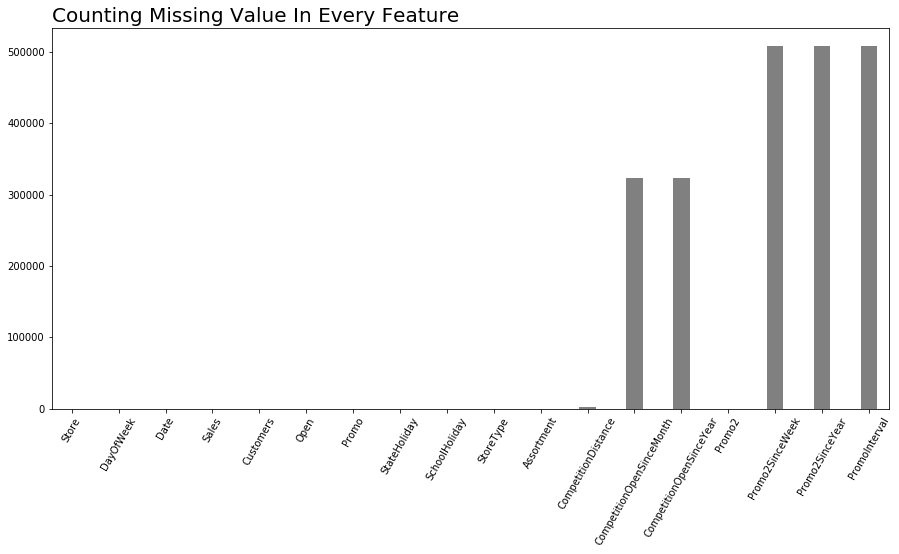

In [31]:
missing_count.plot(kind="bar", figsize=(15, 7), rot=60, legend=False, width=0.35, facecolor="grey")
plt.title("Counting Missing Value In Every Feature", loc="left", fontsize=20)
plt.show()

In [8]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [9]:
data.shape

(1017209, 18)

In [10]:
data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [11]:
data.sort_values(by="Date").head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1016473,379,2,2013-01-01,0,0,0,0,a,1,d,a,6630.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
# group by date to caculate the data
sales_by_date = data.groupby(["Date"], as_index=False)["Sales"].sum()

In [13]:
sales_by_date["rollingsum"] = sales_by_date["Sales"].rolling(7).mean()

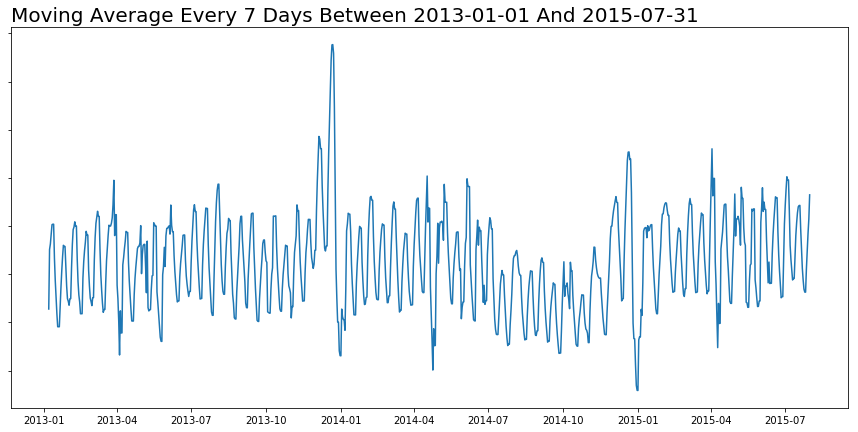

In [14]:
plt.figure(figsize=(15,7))
plt.plot(sales_by_date["Date"].get_values(), sales_by_date["rollingsum"].get_values())
plt.tick_params(labelleft=False)
plt.title("Moving Average Every 7 Days Between %s And %s" % (sales_by_date["Date"].min().date(), sales_by_date["Date"].max().date()),
         loc="left", fontsize=20)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

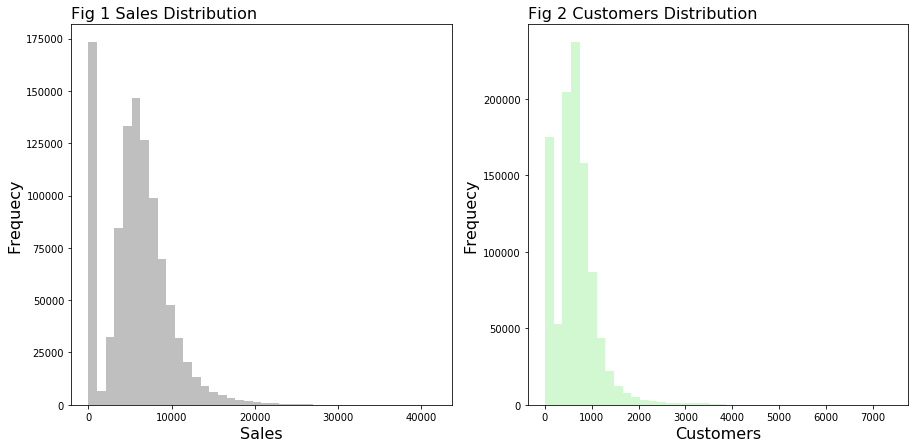

In [15]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.hist(data["Sales"], bins=40, color="grey", alpha=0.5)
plt.title("Fig 1 Sales Distribution", loc="left", fontsize=16)
plt.xlabel("Sales", fontsize=16)
plt.ylabel("Frequecy", fontsize=16)

plt.subplot(122)
plt.hist(data["Customers"], bins=40, color="lightgreen", alpha=0.4)
plt.title("Fig 2 Customers Distribution", loc="left", fontsize=16)
plt.xlabel("Customers", fontsize=16)
plt.ylabel("Frequecy", fontsize=16)
plt.show()

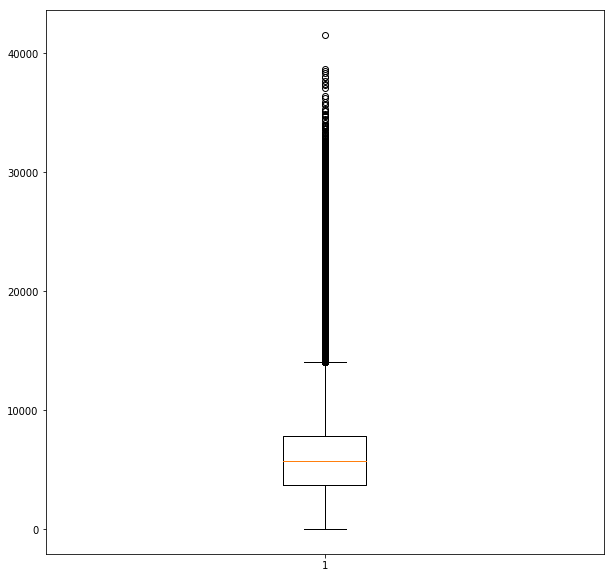

In [16]:
plt.figure(figsize=(10, 10))
plt.boxplot(data["Sales"])
plt.show()

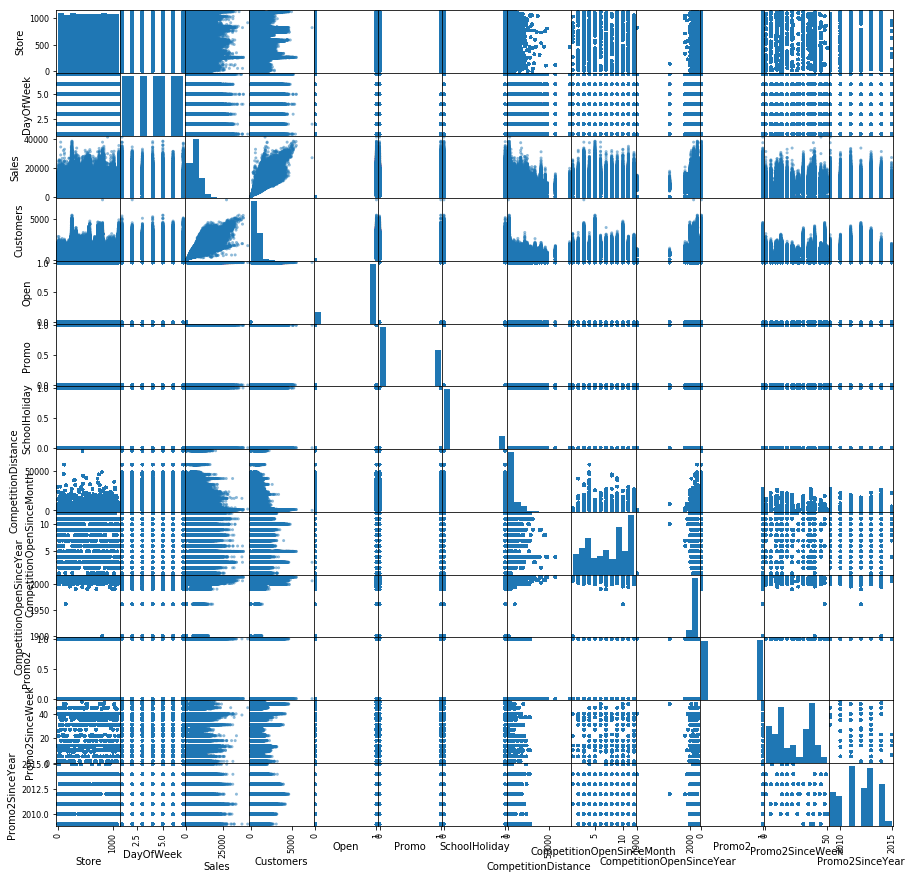

In [37]:
pd.plotting.scatter_matrix(data, figsize=(15, 15))
plt.show()